<a href="https://colab.research.google.com/github/ella-mei/spotify_exploration/blob/main/circularclock_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

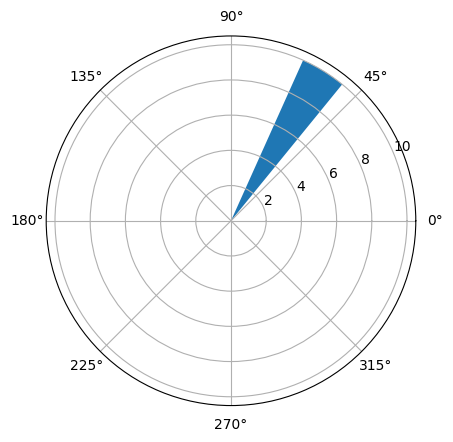

In [4]:
# Import required package and abbreviation
import matplotlib.pyplot as plt
import numpy as np # so I can use np.pi
import pandas as pd

# Then set up the plot with polar coordinates
plt.subplot(111, polar=True);

# Add a bar in the polar coordinates
plt.bar(x=45, height=10, width=np.pi/12, bottom=0);

In [5]:
# Create a dataframe which assigns each hour of the day to how many songs were streamed in that hour:

df = pd.DataFrame(
        {
            'Name': [str(i) + ":00" for i in list(range(0, 24))],
            'Value': [220,217,277,353,369,363,340,372,589,639,865,832,813,763,717,889,832,885,1189,1140,867,589,379,251]
        })

df

,Name,Value
0,0:00,220
1,1:00,217
2,2:00,277
3,3:00,353
4,4:00,369
5,5:00,363
6,6:00,340
7,7:00,372
8,8:00,589
9,9:00,639


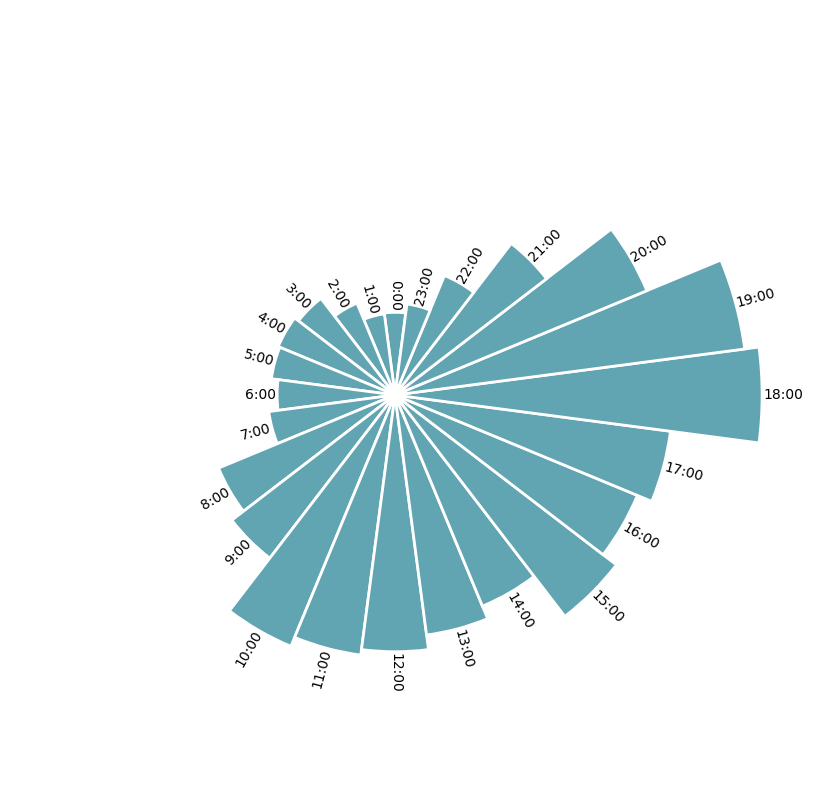

In [6]:
# set figure size
plt.figure(figsize=(15,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(6, len(df.index)+6))
angles = [element * width for element in indexes]
angles


# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    #  add  labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor")
